In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as anim
from IPython.display import HTML

In [2]:
m = 0.1
r = 0.1
d = 0.3
g = 9.81
dpsi_ = 400.
t = np.linspace(0,8,500)

In [3]:
I_z = 0.5*m*r**2
I_0 = 0.25*m*r**2+m*d**2

Recordemos que los momentos generalizados de las coordenadas $\phi$ y $\psi$ se conservan, es decir, permanecen constantes en el tiempo

In [4]:
def System(y,t,m,r,d,g,dpsi_,I_z,I_0,theta0):
    
    phi, psi, theta, dtheta = y
    
    dpsi = dpsi_
    P_phi = I_z*dpsi*np.cos(theta0)
    dphi = (P_phi-I_z*dpsi*np.cos(theta))/(I_0*(np.sin(theta))**2+I_z*(np.cos(theta))**2)
    omega = dtheta
    
    domega = ((dphi**2)*np.sin(theta)*np.cos(theta)*(I_0-I_z)-I_z*dphi*dpsi*np.sin(theta)+m*g*d*np.sin(theta))/I_0
    
    return [dphi,dpsi,omega,domega]

In [5]:
y0=[0,0,(1/4)*np.pi,0]
sol= odeint(System,y0,t,args=(m,r,d,g,dpsi_,I_z,I_0,(1/4)*np.pi))

In [6]:
phi=sol[:,0]
psi=sol[:,1]
theta=sol[:,2]
omega=sol[:,3]

<IPython.core.display.Javascript object>


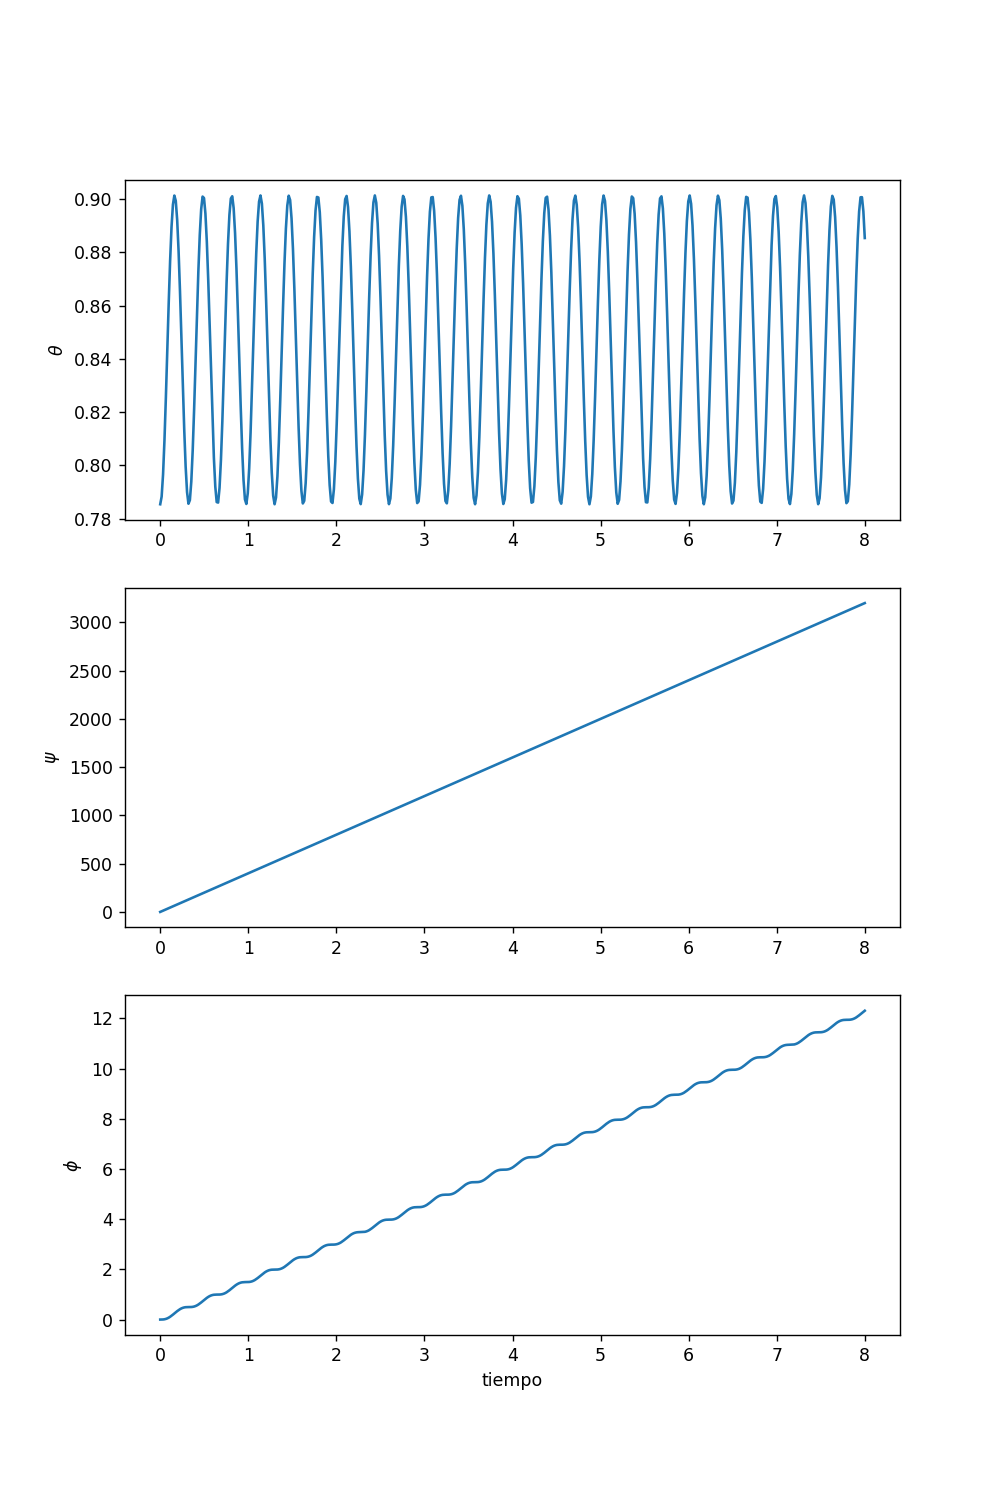

Text(0.5, 0, 'tiempo')

In [7]:
fig, ax = plt.subplots(3,1, figsize=(8, 12))

ax[0].plot(t,theta)
ax[0].set_ylabel(r'$\theta$')
ax[1].plot(t,psi)
ax[1].set_ylabel(r'$\psi$')
ax[2].plot(t,phi)
ax[2].set_ylabel(r'$\phi$')
ax[2].set_xlabel('tiempo')

In [8]:
r=np.zeros([len(t),3])

for i in range(len(t)):
    r[i,0]=d*np.sin(theta[i])*np.cos(phi[i])
    r[i,1]=d*np.sin(theta[i])*np.sin(phi[i])
    r[i,2]=d*np.cos(theta[i])

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='3d')
#scale=35

def init():
    
    ax.clear()
    ax.set_xlim(-0.3,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_zlim(0,0.25)
    

    
def Update(i):
    
    init()

        
    x = r[i,0]
    y = r[i,1]
    z = r[i,2]
    
    history_x=r[:i,0]
    history_y=r[:i,1]
    history_z=r[:i,2]
     
    ax.plot(history_x, history_y,history_z,'.-', lw=1, ms=2,c="r")
    
    ax.scatter(x,y,z,c="b")
    ax.plot([0,x], [0,y],[0,z], 'o-', lw=2,c="b")
    ax.set_title(r't={:.3f}s'.format(t[i]))
  
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)

<IPython.core.display.Javascript object>

In [9]:
def GetFit(x,y,n=1):
    
    l = len(x)
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [10]:
param = GetFit(np.array(t),np.array(phi),1)
V_precesion = param[1]
V_precesion

1.5322247693297564